# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset Preparation

## Data Generation

In [2]:
n=30
a = np.random.randint(0,n,size=n)
a 

array([21, 21, 15,  0, 10, 14, 15, 12, 23,  2, 10, 16, 23, 21, 21, 23, 11,
        6, 16, 24,  8,  9, 11, 15, 12,  8, 28, 25,  0, 27])

## Auxilary Array Definition
- dp: dp[i] represents the length of the longest subsequence with the last element i
- pre_node: pre_node[i] represents the previous node of element i in the longest subsequence with the last element i
- path: path[i] records each path for the longest subsequence with the last element i

In [3]:
dp = [1]*n
pre_node = [i for i in range(n)]
path = [[] for _ in range(n)]

# Calculate dp (without recursion)

In [4]:
for j in range(1,n):
    for i in range(j):
        if a[i]<=a[j] and dp[j]<dp[i]+1:
            dp[j]=dp[i]+1
            pre_node[j]=i    

In [5]:
print(dp)
print(pre_node)

[1, 2, 1, 1, 2, 3, 4, 3, 5, 2, 3, 5, 6, 6, 7, 8, 4, 3, 6, 9, 4, 5, 6, 7, 7, 5, 10, 10, 2, 11]
[0, 0, 2, 3, 3, 4, 5, 4, 6, 3, 4, 6, 8, 11, 13, 14, 10, 9, 11, 15, 17, 20, 21, 22, 22, 20, 19, 19, 3, 27]


# Use list pre_node to calculate list path

In [6]:
for j in range(n):
    if pre_node[j]==j:
        path[j].append(j)
        continue
    tmp = path[pre_node[j]].copy()
    tmp.append(j)
    path[j]=tmp

In [7]:
path

[[0],
 [0, 1],
 [2],
 [3],
 [3, 4],
 [3, 4, 5],
 [3, 4, 5, 6],
 [3, 4, 7],
 [3, 4, 5, 6, 8],
 [3, 9],
 [3, 4, 10],
 [3, 4, 5, 6, 11],
 [3, 4, 5, 6, 8, 12],
 [3, 4, 5, 6, 11, 13],
 [3, 4, 5, 6, 11, 13, 14],
 [3, 4, 5, 6, 11, 13, 14, 15],
 [3, 4, 10, 16],
 [3, 9, 17],
 [3, 4, 5, 6, 11, 18],
 [3, 4, 5, 6, 11, 13, 14, 15, 19],
 [3, 9, 17, 20],
 [3, 9, 17, 20, 21],
 [3, 9, 17, 20, 21, 22],
 [3, 9, 17, 20, 21, 22, 23],
 [3, 9, 17, 20, 21, 22, 24],
 [3, 9, 17, 20, 25],
 [3, 4, 5, 6, 11, 13, 14, 15, 19, 26],
 [3, 4, 5, 6, 11, 13, 14, 15, 19, 27],
 [3, 28],
 [3, 4, 5, 6, 11, 13, 14, 15, 19, 27, 29]]

# Get the longest subsequence and visualize it

In [8]:
pos = -1
length = -1 
for i in range(n):
    if dp[i]>length:
        pos = i
        length=dp[i]
length,path[pos] 

(11, [3, 4, 5, 6, 11, 13, 14, 15, 19, 27, 29])

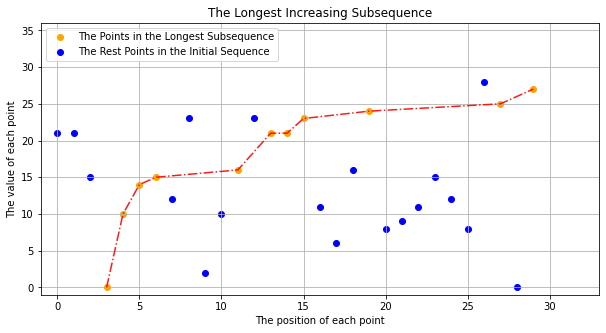

In [9]:
rest = list(set(range(n))-set(path[pos]))
num = len(rest)

plt.figure(figsize=(10, 5))

plt.grid('minor')

plt.xlim(-1,n+3)
plt.ylim(-1,max(a)+8)
plt.scatter(path[pos],np.array(a)[path[pos]],c='orange',label='The Points in the Longest Subsequence')
plt.scatter(rest,np.array(a)[rest],c='blue',label='The Rest Points in the Initial Sequence')
plt.plot(path[pos],np.array(a)[path[pos]],c='red',linestyle='-.',label=None,alpha=0.9)
plt.legend(loc=2)
plt.xlabel('The position of each point')
plt.ylabel('The value of each point')
plt.title('The Longest Increasing Subsequence')
plt.savefig("path.png",dpi=300)
plt.show()